In [ ]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,PowerTransformer
from scipy import stats
from sklearn.pipeline import Pipeline

import statsmodels.api as sm

In [9]:
# need to be able to import src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# absolute path to the src directory
src_path = os.path.abspath("../src")

# Add src directory to system path
sys.path.append(src_path)

# get the /MLCBAss1/Assignment-1 path
ass_path=sys.path[-2]

print(ass_path)


/home/sdi1700187/MLCBAss1/Assignment-1


In [10]:
from functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# we load the two datasets
dev_set_df=pd.read_csv("../data/assignment1_dev_set.csv")
val_set_df=pd.read_csv("../data/assignment1_val_set.csv")


In [12]:
# we clean the datasets
frames_dev=clean_data(dev_set_df)
frames_val=clean_data(val_set_df)

No duplicates in the set
No duplicates in the set


--> BMI <--
 Mean:24.939550102249488 
 Standard deviation: 4.20340569413587
 Max:67.26 
 Min:16.97


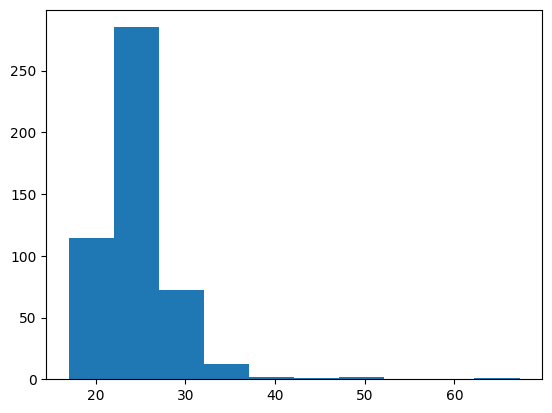

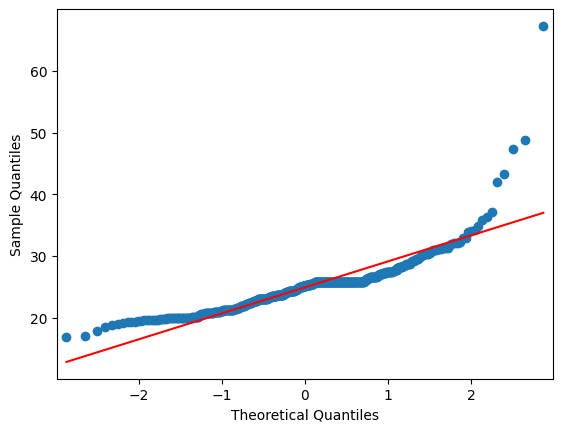

Statistics=0.793, p=0.000
BMI Sample does not look Gaussian (reject H0)


In [16]:
# we will get a general idea of our data

#starting with the BMI
bmi=frames_dev[0]

print(f"--> BMI <--\n Mean:{np.mean(bmi)} \n Standard deviation: {np.std(bmi)}\n Max:{np.max(bmi)} \n Min:{np.min(bmi)}")


# we will check the normality of the bmi
# first, we will get a rough idead visually, using a histogram and a qqplot
# histogram
plt.hist(bmi)
# qqplot
sm.qqplot(bmi, line='s')
plt.show()

# next we check properly, using the shapiro-wilk test for normality, with our null hypothesis being that the bmi data do not follow the normal distribution
# normality test
stat, p = stats.shapiro(bmi)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
if p > 0.05:
	print('BMI Sample looks Gaussian (fail to reject H0)')
else:
	print('BMI Sample does not look Gaussian (reject H0)')

In [9]:
data_path=ass_path + "/data"

# we save the two clean datasets
save_clean_data(frames=frames_dev,mode="Dev",data_path=data_path)
save_clean_data(frames=frames_val,mode="Eval",data_path=data_path)

Creating dataframe for the clean data...
The shape of the clean dataframe is: (489, 137)
Saving final clean data to: /home/sdi1700187/MLCBAss1/Assignment-1/data/development_final_data.csv
Saved the clean dataframe at: /home/sdi1700187/MLCBAss1/Assignment-1/data/development_final_data.csv
Creating dataframe for the clean data...
The shape of the clean dataframe is: (211, 137)
Saving final clean data to: /home/sdi1700187/MLCBAss1/Assignment-1/data/evaluation_final_data.csv
Saved the clean dataframe at: /home/sdi1700187/MLCBAss1/Assignment-1/data/evaluation_final_data.csv
